<a href="https://colab.research.google.com/github/basharbayatna/Prediction-Of-Product-Sales/blob/main/Prediction_Of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Of Product Sale
- Author: Bashar Bayatna
## Project Overview

## Load and Inspect Data




In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

df = pd.read_csv(url)

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


In [59]:
df.shape

(8523, 12)

In [60]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [62]:
duplecated_rows = df.duplicated(keep = False)
duplecated_rows.sum()


np.int64(0)

In [63]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [64]:
df.isna().sum()/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [65]:
object_col = df.select_dtypes('object').columns
df[object_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [66]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [67]:
number_col = df.select_dtypes('number').columns
number_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

np.int64(0)

In [69]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [70]:
for i in object_col:
  print(f'Value Count for {i}')
  print(df[i]. value_counts())
  print('\n')
  print('\n')

Value Count for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64




Value Count for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64




Value Count for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64




Value Count for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT0

In [71]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [72]:
df['Item_Type'] = df['Item_Type'].replace('Breads', 'Baking Goods')
df['Item_Type'] = df['Item_Type'].replace('Starchy Foods', 'Baking Goods')

df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Baking Goods,1047
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Health and Hygiene,520
Soft Drinks,445


In [73]:
df[number_col].describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [74]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exloratory Data Analysis


-We will use histogram to view the distribution of numarical features in the dataset

In [75]:
df[number_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


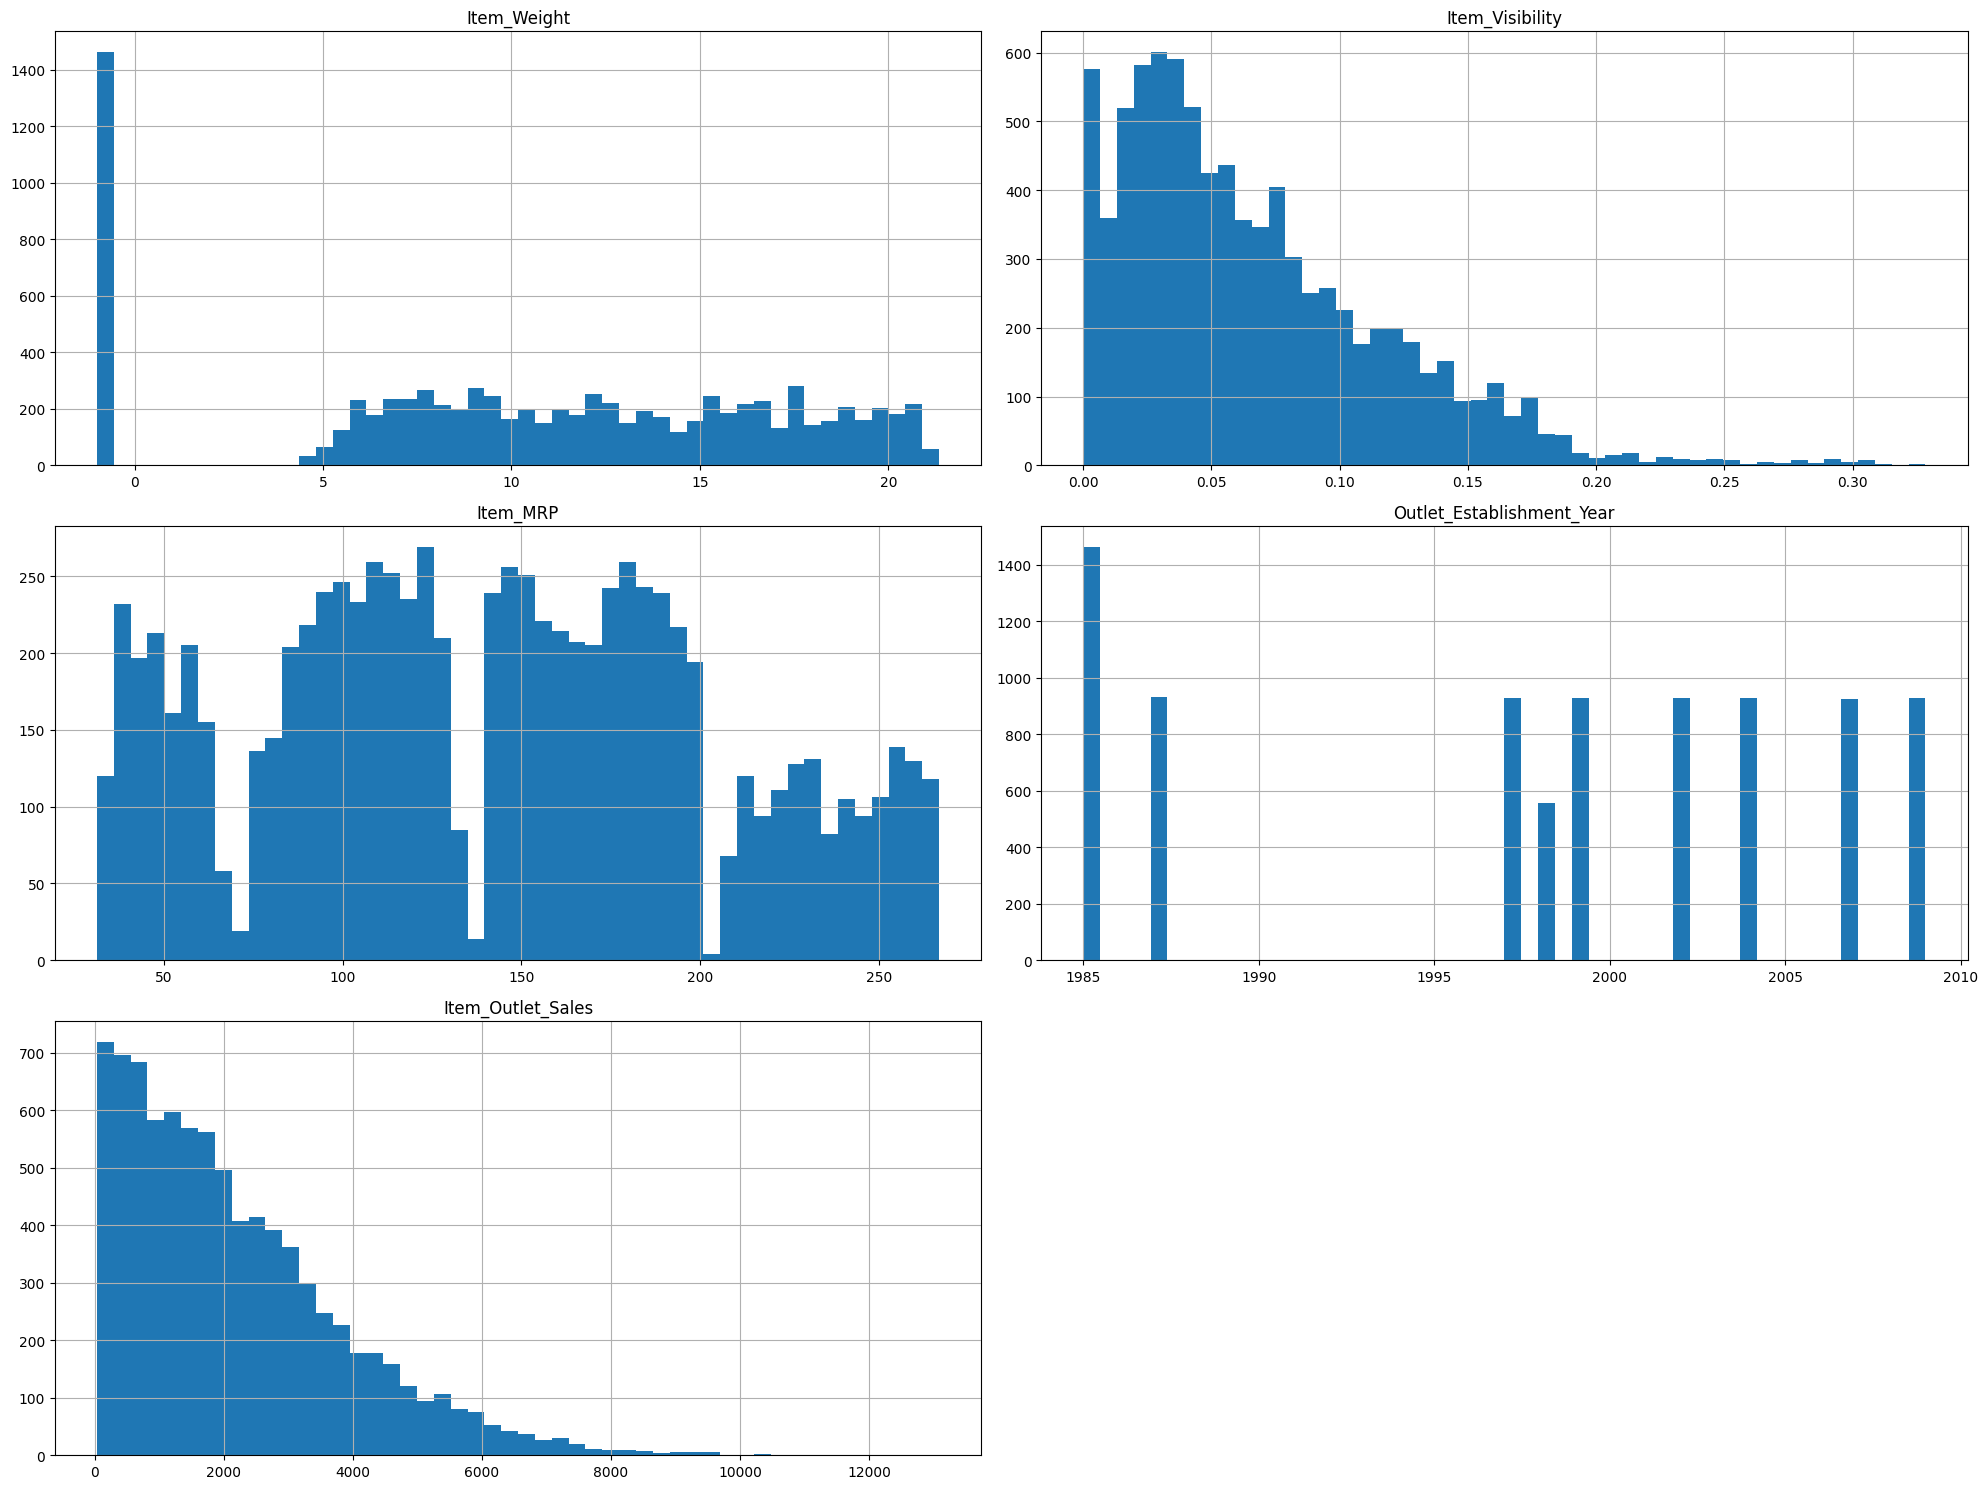

In [76]:
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()


-Now we will dig deeper and see every feature on its own

[Text(0.5, 1.0, 'Distributions of Items Weight'), Text(0.5, 0, 'Weight In KG')]

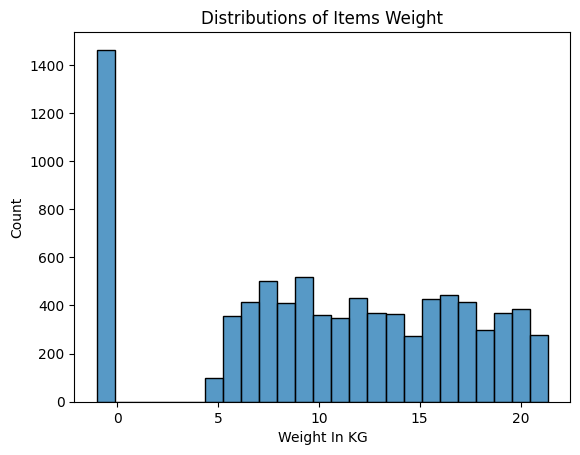

In [77]:
#For the Item_Weight
ax=sns.histplot(data=df, x='Item_Weight',edgecolor='black')
ax.set(title='Distributions of Items Weight', xlabel='Weight In KG')

[Text(0.5, 1.0, 'Distributions of Items Weight'), Text(0.5, 0, 'Weight In KG')]

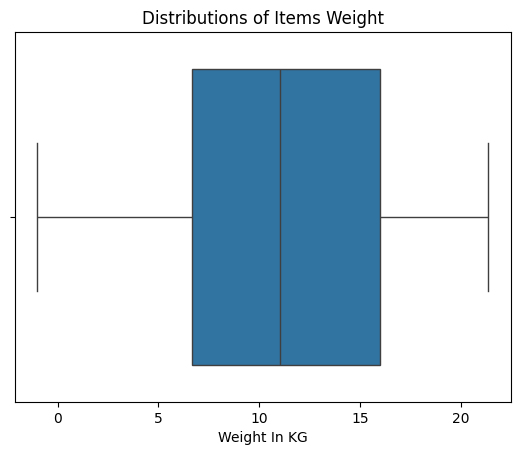

In [78]:
#For the Item_Weight
ax=sns.boxplot(data=df, x='Item_Weight')
ax.set(title='Distributions of Items Weight', xlabel='Weight In KG')

[Text(0.5, 1.0, 'Distributions of Items Visibility')]

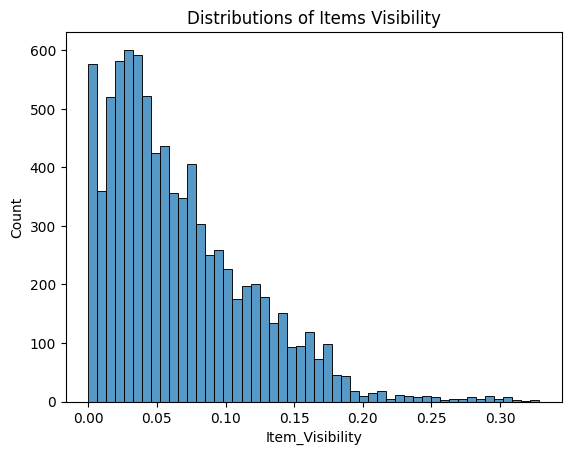

In [79]:
#For the Item_Visibility
ax=sns.histplot(data=df, x='Item_Visibility',edgecolor='black')
ax.set(title='Distributions of Items Visibility')

[Text(0.5, 1.0, 'Distributions of Items Visibility')]

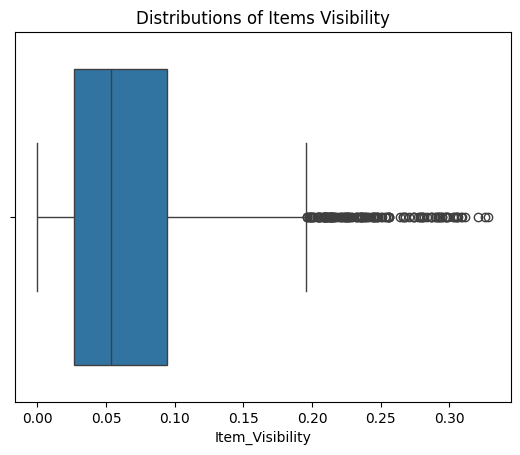

In [80]:
#For the Item_Visibility
ax=sns.boxplot(data=df, x='Item_Visibility')
ax.set(title='Distributions of Items Visibility')

[Text(0.5, 1.0, 'Distributions of  Items MRP')]

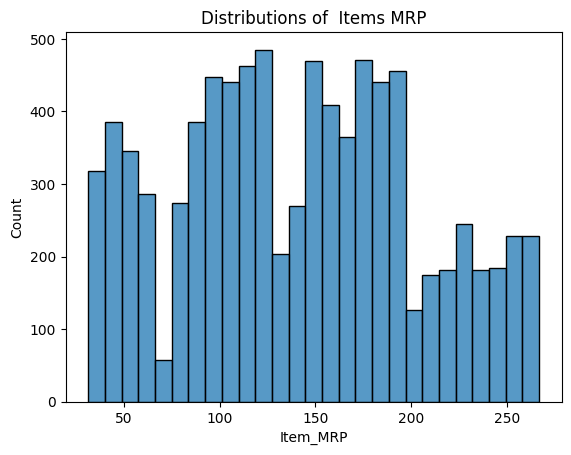

In [81]:

#For the Item_MRP
ax=sns.histplot(data=df, x='Item_MRP',edgecolor='black')
ax.set(title='Distributions of  Items MRP')

[Text(0.5, 1.0, 'Distributions of  Items MRP')]

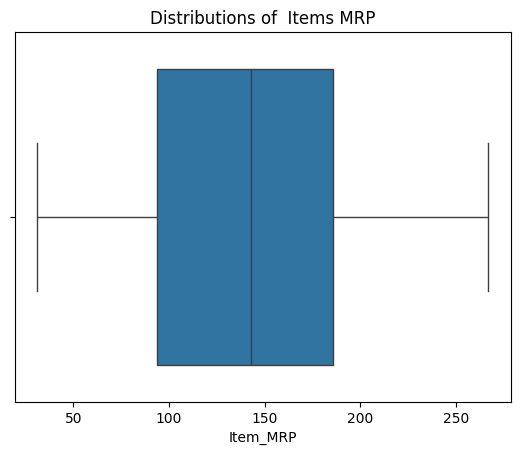

In [82]:

#For the Item_MRP
ax=sns.boxplot(data=df, x='Item_MRP')
ax.set(title='Distributions of  Items MRP')

[Text(0.5, 1.0, 'Distributions of Outlet_Establishment_Year')]

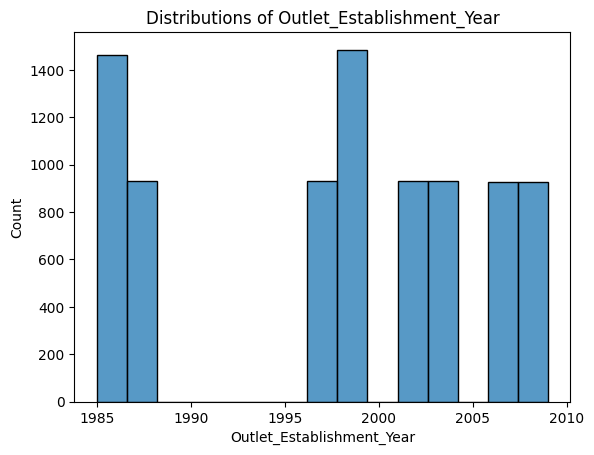

In [83]:
#For the Outlet_Establishment_Year
ax=sns.histplot(data=df, x='Outlet_Establishment_Year',edgecolor='black')
ax.set(title='Distributions of Outlet_Establishment_Year')

[Text(0.5, 1.0, 'Distributions of Outlet_Establishment_Year')]

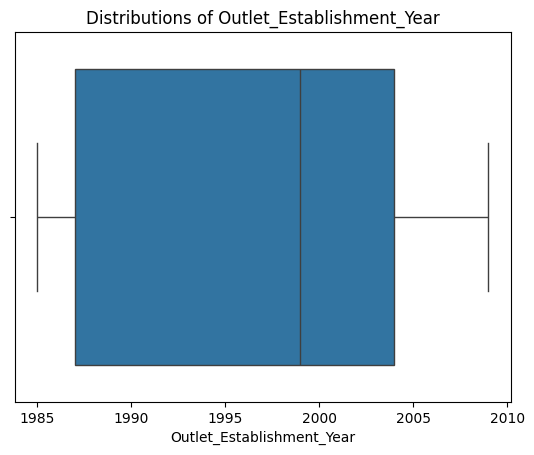

In [84]:
#For the Outlet_Establishment_Year
ax=sns.boxplot(data=df, x='Outlet_Establishment_Year')
ax.set(title='Distributions of Outlet_Establishment_Year')

[Text(0.5, 1.0, 'Distributions of Item_Outlet_Sales')]

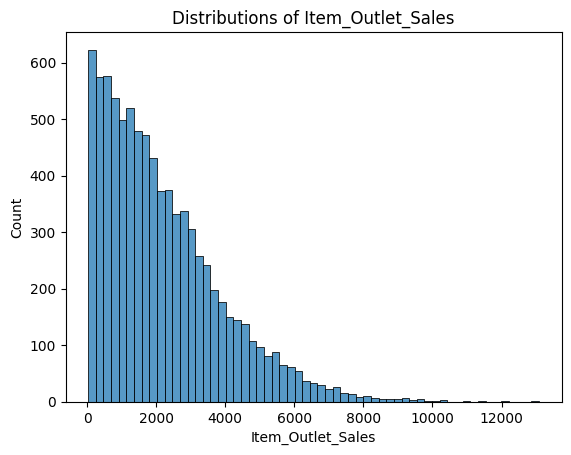

In [85]:

#For the Item_Outlet_Sales
ax=sns.histplot(data=df, x='Item_Outlet_Sales',edgecolor='black')
ax.set(title='Distributions of Item_Outlet_Sales')

[Text(0.5, 1.0, 'Distributions of Item_Outlet_Sales')]

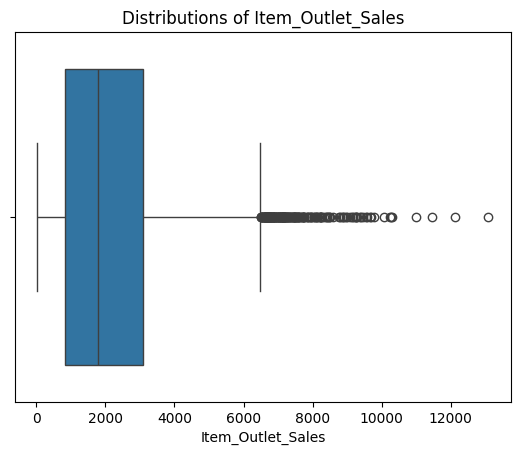

In [86]:

#For the Item_Outlet_Sales
ax=sns.boxplot(data=df, x='Item_Outlet_Sales')
ax.set(title='Distributions of Item_Outlet_Sales')

In [87]:
object_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

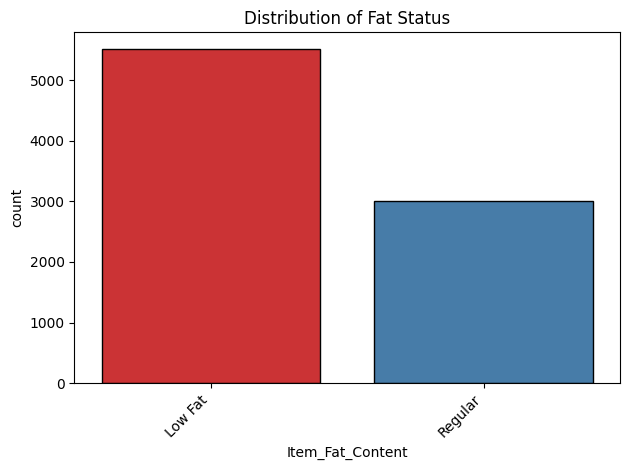

In [88]:

ax = sns.countplot(data=df,  x='Item_Fat_Content', edgecolor='black',palette='Set1',hue='Item_Fat_Content')

plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Fat Status')
plt.tight_layout()
plt.show()


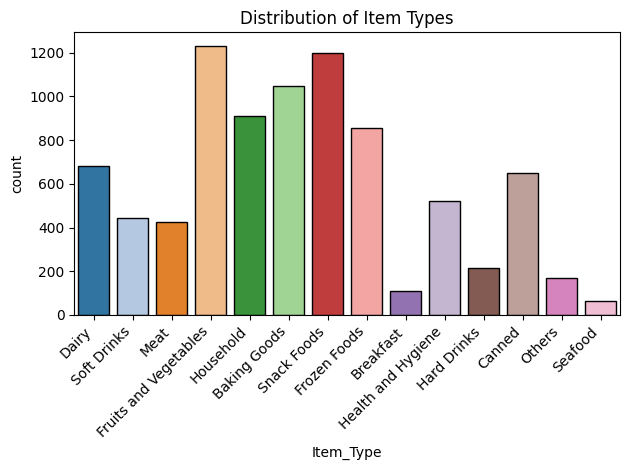

In [89]:

ax = sns.countplot(data=df,  x='Item_Type', edgecolor='black',palette='tab20',hue='Item_Type')

plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Item Types')
plt.tight_layout()
plt.show()





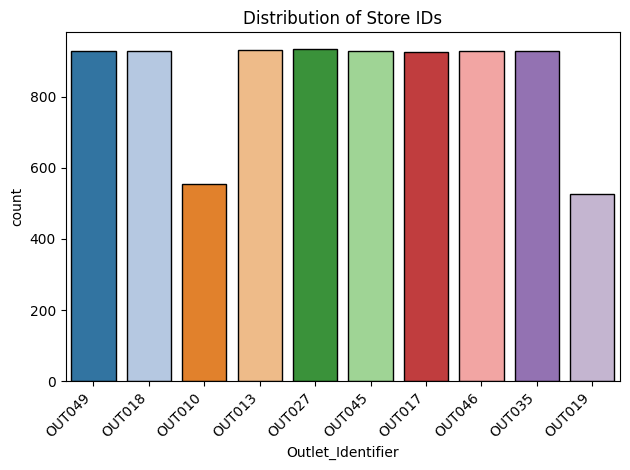

In [90]:

ax = sns.countplot(data=df,  x='Outlet_Identifier', edgecolor='black',palette='tab20',hue='Outlet_Identifier')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Store IDs')
plt.tight_layout()
plt.show()




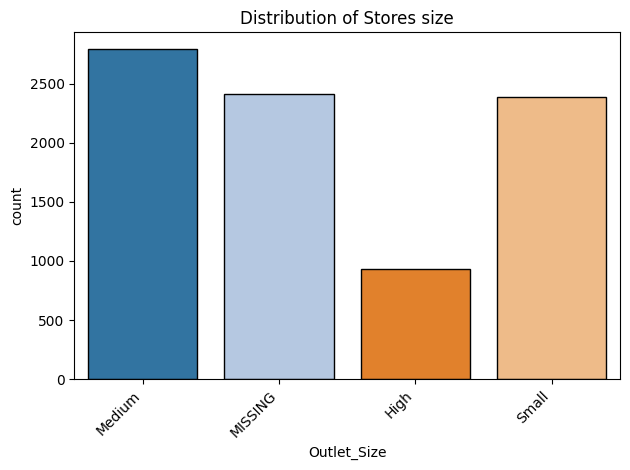

In [91]:

ax = sns.countplot(data=df,  x='Outlet_Size', edgecolor='black',palette='tab20',hue='Outlet_Size')




plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Stores size')
plt.tight_layout()
plt.show()


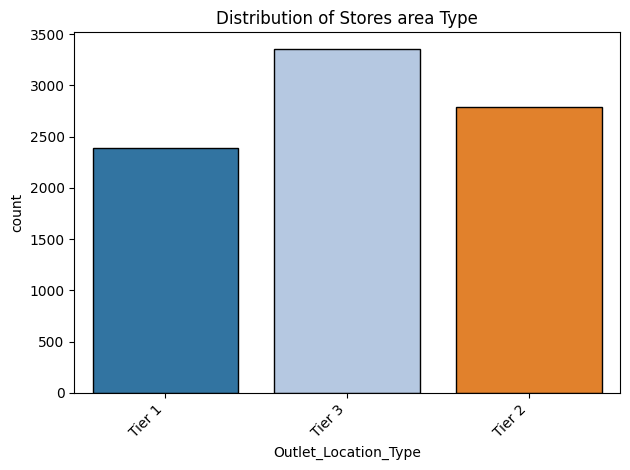

In [92]:

ax = sns.countplot(data=df,  x='Outlet_Location_Type', edgecolor='black',palette='tab20',hue='Outlet_Location_Type')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Stores area Type')
plt.tight_layout()
plt.show()



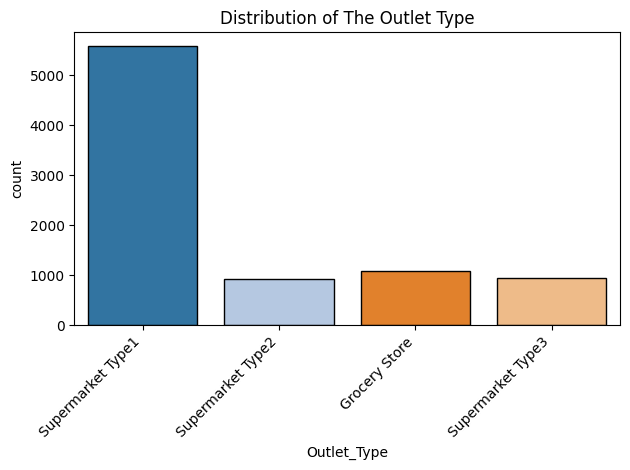

In [93]:

ax = sns.countplot(data=df,  x='Outlet_Type', edgecolor='black',palette='tab20',hue='Outlet_Type')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of The Outlet Type')
plt.tight_layout()
plt.show()




In [94]:
correlation= df.corr(numeric_only=True)
correlation.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


[Text(0.5, 1.0, 'Heatmap')]

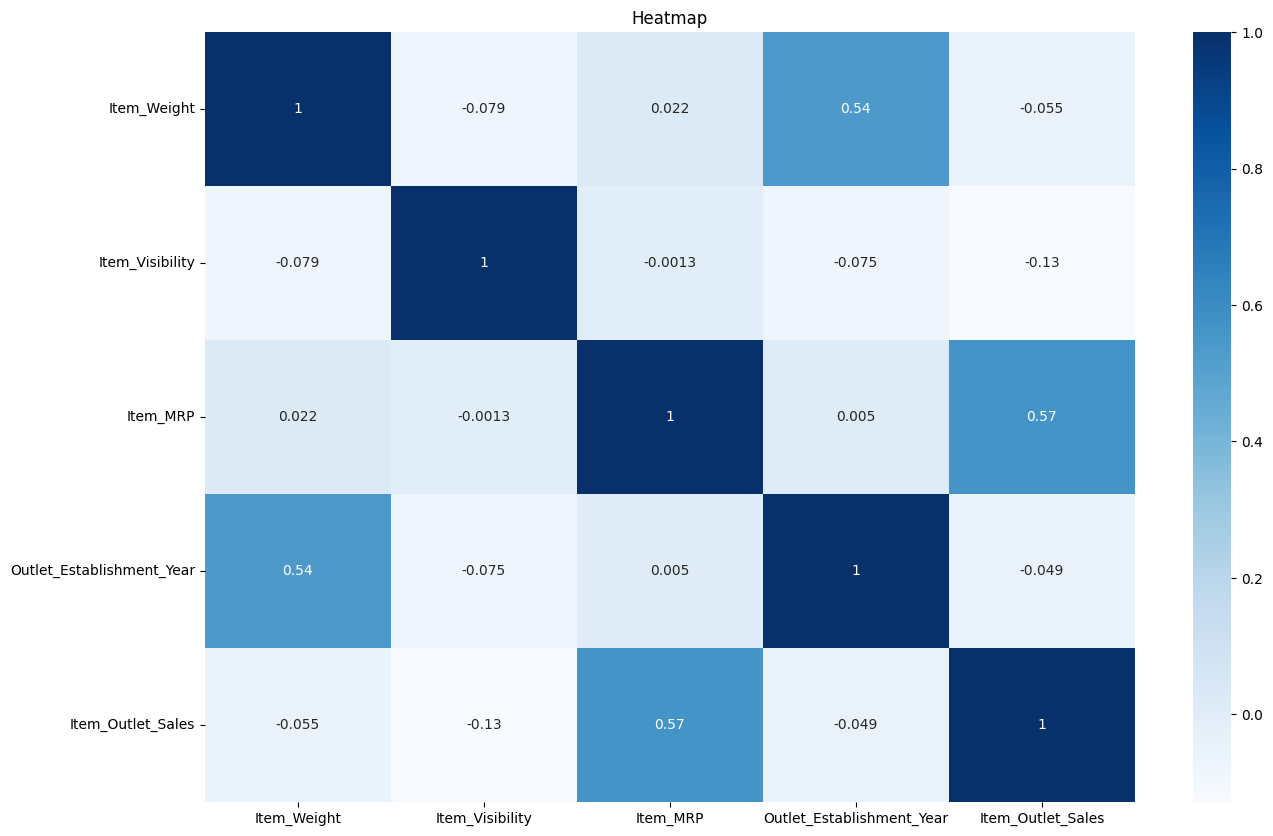

In [95]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(correlation, cmap='Blues',annot=True)
ax.set(title='Heatmap')

## Feature Inspection
